# Signal Analysis

## 1. Recording

#### - Step 1: Install Audacity: https://www.audacityteam.org/download/
#### - Step 2: Record the sentence and save it into a file

## 2. Plot Signal

### Note: You need to install 'librosa' and 'matplot' libraries.

## A. Import required packages

In [2]:
# Import required packages.
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

## B. Read speech data

In [16]:
# Set the directory path of the data directory.
audio_path = './data/'

# Load a waveform.
xn_org, sf_org = librosa.load(audio_path+'2019451104_test.wav', sr=16000)
sf, xn_org = wavfile.read(audio_path+'2019451104_test.wav')
# +-1로 되어 있는 float 되어 있음

#print(f'sampling rate : {sf_org}')
#print(f'length of signal : {len(xn_org)/sf_org:.2f} seconds')
#몇샘플을 샘플링 프리퀀시로 나누면 seconds가 나옴

In [17]:
#xn_org
xn_org

array([13, 13, 12, ..., 40, 48, 40], dtype=int16)

## C. Plot and play the signal

signal : 106627 second 6.6641875


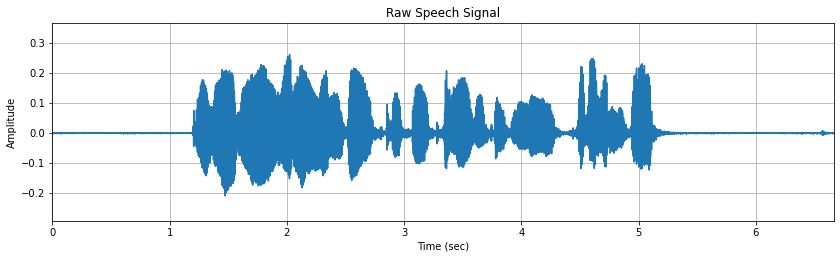

In [9]:
# Define a function to plot a time-domain signal.
def plot_signal(signal, sf):
    # 신호를 주고, 샘플링 프리퀀시를 주는 것임
    # arg로 시간 시작과 끝을 나타내자
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(211)
    ax.set_title('Raw Speech Signal')
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude')
    ax.grid(True)
    N = len(signal) # 몇샘플인지 보고
    print("signal : {0} second {1}".format(N, N/sf))
    nx = np.linspace(0, N/sf, N)    # 시간까지를 N개로 쪼개라
    ax.plot(nx, signal)
    ax.set_xlim(nx.min(), nx.max()) # x범위
    ax.set_ylim(signal.min()*1.4, signal.max()*1.4) #y범위
    
    # Plot the designated time segment.
#     start_time, end_time = 0.4, 1.0
#     ax.set_xlim(start_time, end_time)
#     start_idx, end_idx = int(start_time*sf), int(end_time*sf)
#     ymin, ymax = signal[start_idx:end_idx].min(), signal[start_idx:end_idx].max()
#     ax.set_ylim(ymin*1.4, ymax*1.4)
    
# Plot the signal.
plot_signal(xn_org, sf_org)

In [10]:
import IPython.display as ipd

# Play the speech signal.
ipd.Audio(xn_org, rate=sf_org)

## 3. Downsampling

In [11]:
# Perform downsampling to 16 and 8 kHz.
xn16khz = librosa.resample(xn_org, sf_org, 16000)
xn8khz = librosa.resample(xn_org, sf_org, 8000)
#ipd.Audio(xn16khz, rate=16000)
#ipd.Audio(xn8khz, rate=8000)

In [12]:
# Compare the length of input and downsampled signals.
xn_length = len(xn_org)
xn16khz_length = len(xn16khz)
xn8khz_length = len(xn8khz)
print(xn_length, xn16khz_length, xn8khz_length)

106627 106627 53314


In [15]:
import IPython.display as ipd

# Play the speech signal.
ipd.Audio(xn8khz, rate=8000)

## 4. Signal spectrum

In [52]:
# Choose the sampling frequency of input signal to process.
sampling_freq = 8000

# Choose an input signal depending on the pre-defined sampling frequency.
if sampling_freq == 44100:
    xn = xn_org    
elif sampling_freq == 16000:
    xn = xn16khz
elif sampling_freq == 8000:
    xn = xn8khz
else:
    print(f'Unsupported sampling frequency : {sampling_freq}')
    raise StopIteration    

### A. Cut short-time segment

64000 320
signal : 320 second 0.04


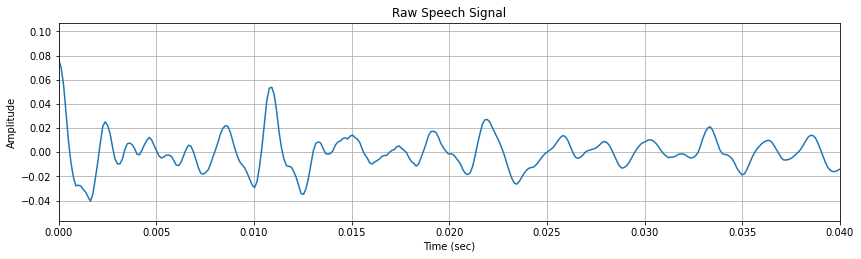

In [92]:
# Cut short-time segment.
def cut_segment(xn, start_position_second, sampling_rate, length_sec):
    nx = int(start_position_second * sampling_rate)
    #초에 sampling rate를 곱하면 몇번쨰 샘플링인지 나오고
    ny = int(length_sec * sampling_rate)
    print(nx, ny)
    return xn[nx:nx+ny] #이게 다 샘플링 단위로 들어 있음

# Define the start time and length of signal (second) to use.
start_time, length = 8, 0.04
sn = cut_segment(xn, start_time, sampling_freq, length)

# Plot the segmented time domain signal.
plot_signal(sn, sampling_freq)

In [93]:
1/0.01 #-> 하이톤~~~ #남자는 100으로 여자는 200을 중심으로

100.0

### B. Magnitude spectrum

In [111]:
from scipy.fftpack import fft

# Perform FFT with a windowed signal.
sn_win = sn * np.hanning(len(sn))
#sn_win = sn
#행잉 윈도우로 곱하고, 
fft_size = pow(2, int(np.log2(len(sn_win)))+1) # opwer of 2
print(fft_size)
#2의 n으로 계산해야함
print("fft_size {0}".format(fft_size))
Sw = fft(sn_win, fft_size) #여기서 복소수가 나옴

# Compute magnitude and log-magnitude spectrum.
half_fft_size = int(fft_size / 2) + 1 # 절반만 사용함 뒤에것은 똑같고 
mag_Sw = abs(Sw[:half_fft_size]) # 스퀘어 루트에 리얼 제곱, 허수 제곱 # complex - max
#mag_Sw = abs(Sw)
logmag_Sw = 20 * np.log10(mag_Sw)

512
fft_size 512


In [112]:
type(Sw)
print(len(Sw)) #우리는 절반만 사용하겠다. 같이 나옴 실수는 중복됨 샘플링 시어럼에 따르면 절반만 됨

512


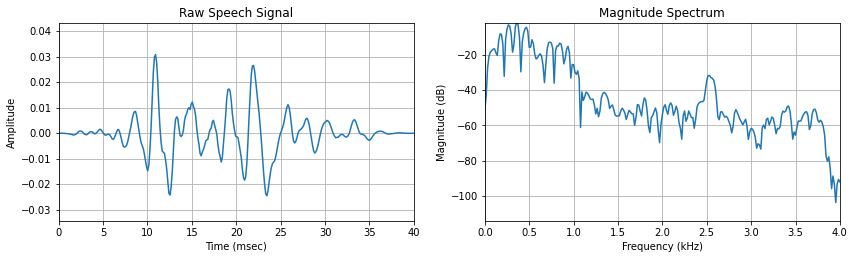

In [113]:
# Plot signal waveform and log-magnitude spectrum.
def plot_signal_spectrum(signal, logmag_sw, sf):
    fig = plt.figure(figsize=(14, 8))
    ax1 = fig.add_subplot(221)
    ax1.set_title('Raw Speech Signal')
    ax1.set_xlabel('Time (msec)')
    ax1.set_ylabel('Amplitude')
    ax1.grid(True)
    N = len(signal)
    nx = np.linspace(0, N/(sf*0.001), N)
    ax1.set_xlim(nx.min(), nx.max())
    ax1.set_ylim(signal.min()*1.4, signal.max()*1.4)    
    ax1.plot(nx, signal)
    
    ax2 = fig.add_subplot(222)
    ax2.set_title('Magnitude Spectrum')
    ax2.set_xlabel('Frequency (kHz)')
    ax2.set_ylabel('Magnitude (dB)')
    ax2.grid(True)
    NF = len(logmag_sw)
    nx2 = np.linspace(0, (sf/2*0.001), NF)
    ax2.set_xlim(nx2.min(), nx2.max())
    ax2.set_ylim(logmag_sw.min()*1.1, logmag_sw.max()*1.4)     
    ax2.plot(nx2, logmag_sw) 
    
# Plot the signal in the time and frequency domain.
plot_signal_spectrum(sn_win, logmag_Sw, sampling_freq)
#여기서 매그니튜트는 첫번째 피크가 뜨는 값이 나의 펀더맨탈 주파수가 될것임
#어떤 신호던지 분리해서 볼수 있음
#타임 도메인 시그널 보다 정보를 더 많이 볼수 있다.
# 지금까지는 아주 짧은 시피치만 본것임

### C. Spectrogram

#### [STFT and Spectrogram]

In [98]:
# Compute short time Fourier transformation (STFT).
def stft(sig, nfft, win_length_time, hop_length_time, fs, window_type='hann'):
    #40m 윈도우 랭스 hop은 shift
    win_sample = int(win_length_time * fs)
    hop_sample = int(hop_length_time * fs)
    #시간을 샘플로 변환
    if window_type == 'hann':
        window = np.hanning(win_sample)
    elif window_type == 'hamming':
        window = np.hamming(win_sample)
    else:
        print('Wrong window type : {}'.format(window_type))
        raise StopIteration
        
    n_frames = int(np.floor((len(sig) - win_sample) / float(hop_sample)) + 1)
    #전체 시그널에서 홉 샘플을 나눠주고, 양쪽을 빼주기 위해 전체 프레임이 몇개냐?
    frames = np.stack([window * sig[step*hop_sample : step*hop_sample + win_sample] for step in range(n_frames)])
    #20미리 10홉 다음 20미리 10홉  홉사이즈가 10이면 27정도 됨
    stft = np.fft.rfft(frames, n = nfft, axis=1)
    return stft

# Plot spectrogram.
def plot_spectrogram(spec, title, sr, type='spectrogram'):    
    plt.title(title)
    if type == 'spectrogram':
        ny = np.arange(0, spec.shape[-1], step=spec.shape[-1]/(sr//2000))
        ny_value = ["{}".format(int(x)) for x in np.arange(0,sr//2,1000)]
        plt.yticks(ny, ny_value)
        plt.ylabel('Frequency [Hz]')
    elif type == 'mel_spectrogram':
        plt.ylabel('The number of mel filterbanks')
    elif type == 'mfcc':
        plt.ylabel('The number of coefficients')
    plt.xlabel('The number of frames')
    plt.imshow(spec.transpose(), cmap='jet', origin='lowest', aspect='auto')
    plt.colorbar()
    plt.show()

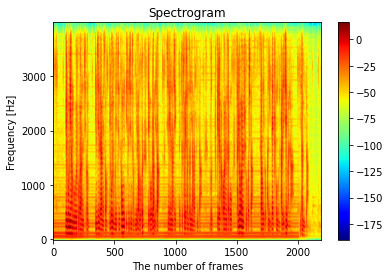

In [107]:
# Compute STFT for the input speech signal. 
nfft = 512 # 주파수 레졸루션
frame_length = 0.05    # analysis frame length (seconds)
shift_length = 0.01    # shift length (seconds) # 대충 1초에 100개
spectrogram = stft(xn, nfft, frame_length, shift_length, sampling_freq, 'hann')
mag = abs(spectrogram)
log_mag = 20 * np.log10(mag + 1.0e-10)

# Plot log-spectrogram.
plot_spectrogram(log_mag, 'Spectrogram', sampling_freq) 
#아 세로의 단면적이 저 위에 있는 매그니튜드 값이다.

In [101]:
np.shape(spectrogram)
# 두번째는 주파수 레졸루션
# 첫번째는 프레임이 몇 프로엠인가?
# spectogram은 2 demansion이다.

(2194, 257)

#### [Mel-filterbank and MFCC]

In [114]:
import scipy

# Obtain mel-scale filterbank.
def get_melfb(sr, nfft, n_mels):
    mel_fb = librosa.filters.mel(sr, n_fft=nfft, n_mels=n_mels)
    return mel_fb

# Compute log mel spectrogram.
def compute_log_melspectrogram(spec, sr, nfft, n_mels):
    mel_fb = get_melfb(sr, nfft, n_mels)
    power_spec = mag**2
    mel_spec = np.matmul(power_spec, mel_fb.transpose())
    mel_spec = 10*np.log10(mel_spec) # power는 10 db는 20임
    return mel_spec

# Compute MFCC.
def compute_mfcc(spec, sr, nfft, n_mels,n_mfcc):
    mel_spec = compute_log_melspectrogram(spec,sr, nfft, n_mels)
    mfcc = scipy.fftpack.dct(mel_spec, axis=-1, norm='ortho')
    return mfcc[:,:n_mfcc]

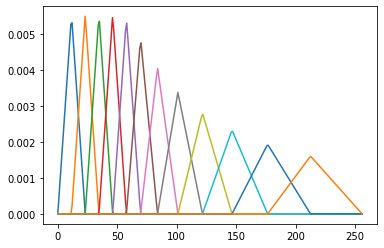

In [115]:
# Get mel filterbank.
num_of_mel_fb = 12
mel_fb = get_melfb(sampling_freq, nfft, n_mels=num_of_mel_fb)

# Check the mel filter bank.
for i in range(len(mel_fb)):
    plt.plot(mel_fb[i])
plt.show()
plt.close()
#x축은 주파수 각각의 색깔이 나와 있는게 주파수 밴드임
#낮은 주파수는 밴드간의 간격이 샤프함
# 0부터 4khz를 몇개으 밴드로 쪼개느냐?
# 높은 주파수로 갈수록 넓어진다. 
# 스펙토그램에서 나온것을 특정 범위로 더해주자. 그래서 사람의 청각 특성과 비슷해짐
# 너비가 1로 되도록 한것임

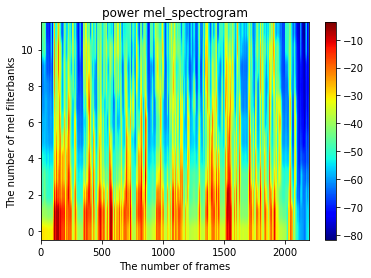

In [116]:
# Compute log mel spectrogram and plot it.
num_of_mfcc = 13
logmel_spec = compute_log_melspectrogram(mag, sampling_freq, nfft, n_mels=num_of_mel_fb)
plot_spectrogram(logmel_spec, 'power mel_spectrogram',sampling_freq, type='mel_spectrogram')
# y축은 12개의 밴드로 나오게 됨
# 이걸 왜하느냐 사람의 청각 특성이 멜필터뱅크를 사용함

In [118]:
np.shape(logmel_spec)

(2193, 12)

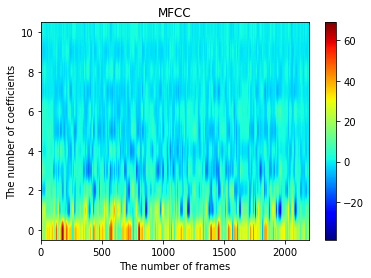

In [120]:
# Compute MFCC and plot it.
num_of_mfcc = 13
mfcc = compute_mfcc(mag, sampling_freq, nfft, n_mels=num_of_mel_fb, n_mfcc=num_of_mfcc)
plot_spectrogram(mfcc[:,1:], 'MFCC', sampling_freq, type='mfcc')
# 사람의 익사이테이션 정보 (성대는) 보컬 트랙터에 대한 정보만 남아 있음

In [22]:
np.shape(mfcc)

(2194, 13)

## 5. Save data into binary files

In [23]:
import pickle

# Write features into files.
with open("input.lmfe", "wb") as f:
    pickle.dump(logmel_spec, f)
    
with open("input.mfcc", "wb") as f:
    pickle.dump(mfcc, f)

# Read features from files.
#with open("input.lmfe", "rb") as f:
#    logmel_spec_in = pickle.load(f)       
#with open("input.mfcc", "rb") as f:
#    mfcc_in = pickle.load(f)    